In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10, 8)})

from neuron import LIF
from snn import SNN

In [2]:
import math


I_constant = lambda x: 4
I_step = lambda x: 5.5 if int(x / 20) % 2 == 0 else 0
I_sin = lambda x: 3 * (math.sin((x) / 3)) + 3.25
I_linear = lambda x: 0.04 * x + 4
I_x2 = lambda x: pow(x - 50, 2) *0.004

In [433]:
data = pd.read_excel('data/CN_3_DATASET.xlsx')

X_train, X_test = [], []
y_train, y_test = [], []

for i in range(10):
    x = data.iloc[1:6, i + 1].to_list()
    x = [int(rec) for rec in x]
    X_train.append(x)
    y = int(data.iloc[6:7, i + 1].to_list()[0])
    y_train.append(y)

for i in range(10):
    x = data.iloc[10:15, i + 1].to_list()
    x = [int(rec) for rec in x]
    X_test.append(x)
    y = int(data.iloc[15:16, i + 1].to_list()[0])
    y_test.append(y)

In [434]:
layers = [
    [LIF(I=lambda x: 4), LIF(I=lambda x: 4), LIF(I=lambda x: 4), LIF(I=lambda x: 4), LIF(I=lambda x: 4)],
    [LIF(I=lambda x: 4), LIF(I=lambda x: 4)]
]

snn = SNN(layers)
snn.fit(X_train, y_train, 5, 100)

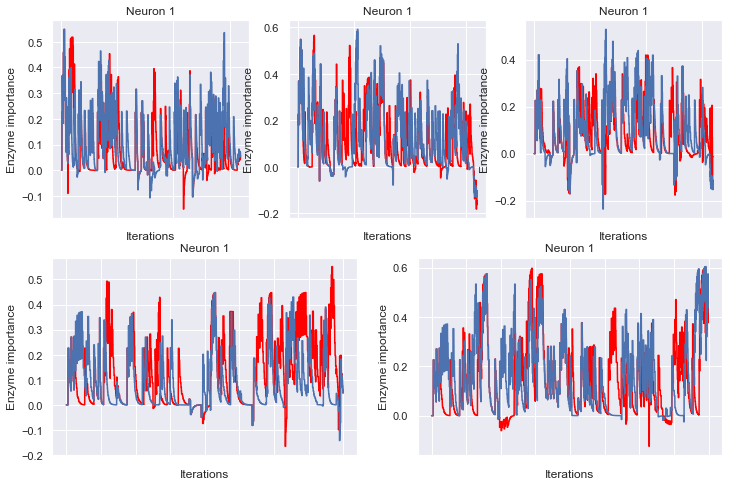

In [448]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(layers[0][0].connections[0].c_history, color='red')
plt.plot(layers[0][0].connections[1].c_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Enzyme importance")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 3, 2)
plt.plot(layers[0][1].connections[0].c_history, color='red')
plt.plot(layers[0][1].connections[1].c_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Enzyme importance")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 3, 3)
plt.plot(layers[0][2].connections[0].c_history, color='red')
plt.plot(layers[0][2].connections[1].c_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Enzyme importance")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 2, 3)
plt.plot(layers[0][3].connections[0].c_history, color='red')
plt.plot(layers[0][3].connections[1].c_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Enzyme importance")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 2, 4)
plt.plot(layers[0][4].connections[0].c_history, color='red')
plt.plot(layers[0][4].connections[1].c_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Enzyme importance")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.show()

Text(0.5, 0, 'Iterations')

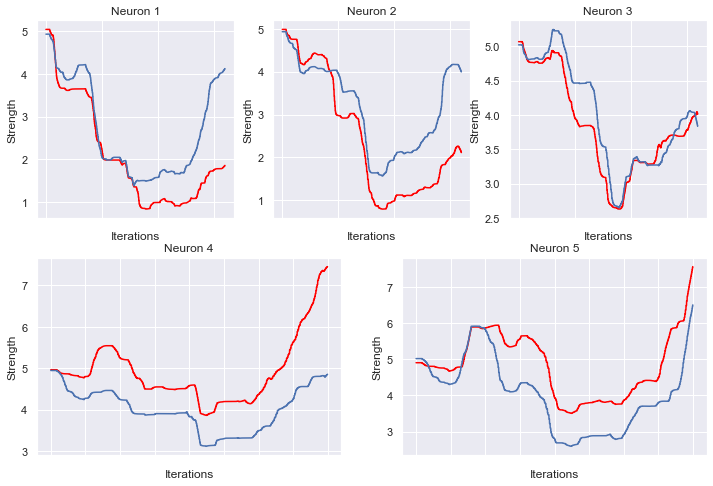

In [446]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(layers[0][0].connections[0].weight_history, color='red')
plt.plot(layers[0][0].connections[1].weight_history)
plt.title("Neuron 1")
plt.gca().set_ylabel("Strength")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 3, 2)
plt.plot(layers[0][1].connections[0].weight_history, color='red')
plt.plot(layers[0][1].connections[1].weight_history)
plt.title("Neuron 2")
plt.gca().set_ylabel("Strength")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 3, 3)
plt.plot(layers[0][2].connections[0].weight_history, color='red')
plt.plot(layers[0][2].connections[1].weight_history)
plt.title("Neuron 3")
plt.gca().set_ylabel("Strength")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 2, 3)
plt.plot(layers[0][3].connections[0].weight_history, color='red')
plt.plot(layers[0][3].connections[1].weight_history)
plt.title("Neuron 4")
plt.gca().set_ylabel("Strength")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

plt.subplot(2, 2, 4)
plt.plot(layers[0][4].connections[0].weight_history, color='red')
plt.plot(layers[0][4].connections[1].weight_history)
plt.title("Neuron 5")
plt.gca().set_ylabel("Strength")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel("Iterations")

In [438]:
y_train_pred = snn.predict(X_train)
print(y_train_pred)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 1]

In [439]:
y_test_pred = snn.predict(X_test)
print(y_test_pred)

[1, 1, 1, 1, 1, 0, 0, 0, 1, 0]

In [455]:
from sklearn.metrics import accuracy_score

print("Train accuracy: ", accuracy_score(y_train, y_train_pred) * 100)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred) * 100)

Train accuracy:  100.0
Test accuracy:  100.0
